In [1]:
import numpy as np

$$ \begin{eqnarray}
\phi(z) = \left\{ 
    \begin{array}{ll}
        1 & (z >= \theta) \\
        -1 & (z < \theta) \\
    \end{array} \right.
\end{eqnarray} $$

$$ z = w^T x $$
$ w = \{w_1, w_2, \cdots, w_n \}$, 
$ x = \{x_1, x_2, \cdots, x_n \} $

\begin{eqnarray}
\phi(z^{\prime}) = \left\{ 
    \begin{array}{ll}
        1 & (z^{\prime} >= 0) \\
        -1 & (z^{\prime} < 0) \\
    \end{array} \right.
\end{eqnarray}

\begin{eqnarray}
    z^{\prime} &=& z - \theta \\
        &=& w^T x - \theta \\
        &=& w^T x + (- \theta) \cdot 1 \\
        &=& w^T x 
\end{eqnarray}

$ w = \{w_0, w_1, w_2, \cdots, w_n \}$ ($ w_0 = -\theta$), 

$ x = \{x_0, x_1, x_2, \cdots, x_n \}$ ($w_0 = 1$)

$$ w_j := w_j + \Delta w_j $$

$$ \Delta w_j = \eta \left(y^{(i)} - \hat{y}^{(i)} \right) x_j^{(i)} $$

* $y$ は出力（ラベル）
* $\eta$ は学習率

In [3]:
np.where(np.array([1,2,3]) > 2, 1, -1)

array([-1, -1,  1])

In [6]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    # z^{\prime}
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # \phi(z^{\prime})
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [21]:
y = np.where(df.iloc[0:100, 4].values == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [22]:
X = df.iloc[0:100, [0, 2]].values
X

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

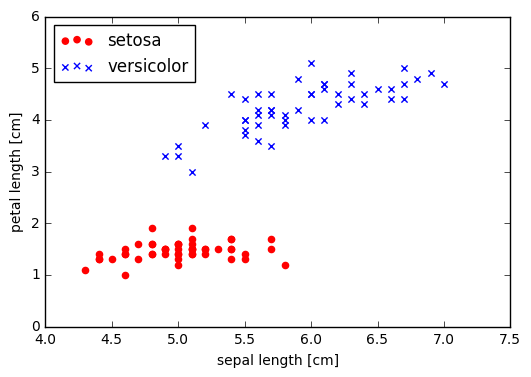

In [28]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [29]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

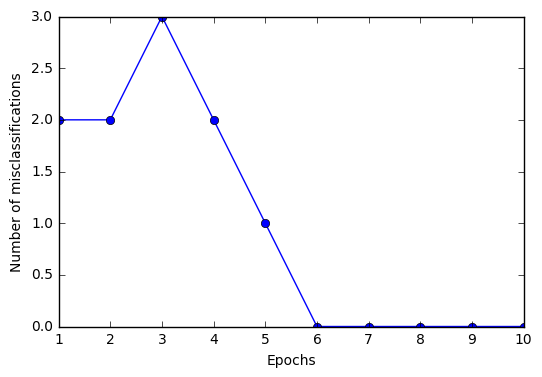

In [30]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [38]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

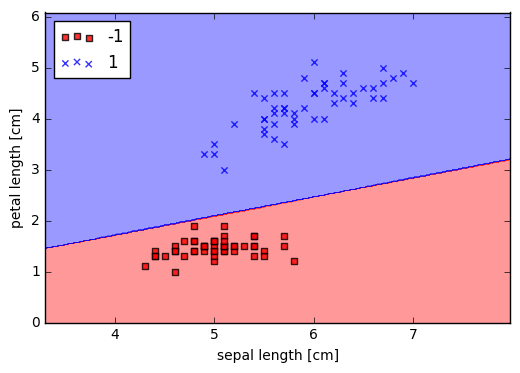

In [39]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()